In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
%matplotlib inline

In [4]:
pwd

'/Users/avayang/Desktop/DS/EDA'

In [5]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
df.shape

(1460, 81)

In [6]:
df.columns = [i.replace(" ", "").lower() for i in df.columns]

In [4]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [48]:
def ames_eda(df): 
    eda_df = {}
    eda_df["dtypes"] = df.dtypes
    eda_df["null_sum"] = df.isnull().sum()
    eda_df["null_pct"] = df.isnull().mean()
    eda_df["count"] = df.count()
    eda_df["mean"] = df.mean()
    eda_df["median"] = df.median()
    eda_df["min"] = df.min()
    eda_df["max"] = df.max()
    
    return pd.DataFrame(eda_df)
ames_eda(df)

,dtypes,null_sum,null_pct,count,mean,median,min,max
1stflrsf,int64,0,0.000000,1460,1162.626712,1087.0,334,4692
2ndflrsf,int64,0,0.000000,1460,346.992466,0.0,0,2065
3ssnporch,int64,0,0.000000,1460,3.409589,0.0,0,508
alley,object,1369,0.937671,91,NaN,NaN,NaN,NaN
bedroomabvgr,int64,0,0.000000,1460,2.866438,3.0,0,8
bldgtype,object,0,0.000000,1460,NaN,NaN,1Fam,TwnhsE
bsmtcond,object,37,0.025342,1423,NaN,NaN,NaN,NaN
bsmtexposure,object,38,0.026027,1422,NaN,NaN,NaN,NaN
bsmtfinsf1,int64,0,0.000000,1460,443.639726,383.5,0,5644
bsmtfinsf2,int64,0,0.000000,1460,46.549315,0.0,0,1474


In [49]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [50]:
df.select_dtypes(include = "object").columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

Exploring the Object Columns:
By inspecting the data dictionary provided, many of these object columns, such as ‘central_air’ and ‘heating_qc’ are categorical or ordinal features that:
1. can be converted to numeric values through data cleaning
2. are intuitively related to the price of a house — a house with central air would logically have a higher sale price than one without, holding all else constant.

# Analyzing Target

In [65]:
df["saleprice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

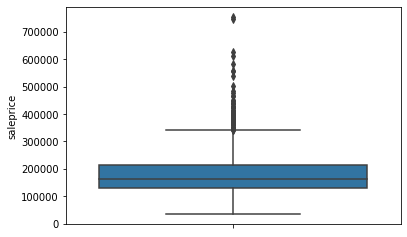

In [58]:
sns.boxplot(y = "saleprice", data = df)
plt.show()

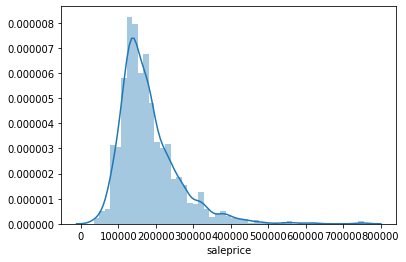

In [80]:
#histogram
sns.distplot(df["saleprice"])
plt.show()

# Exploring Relationships with the Target

## Relationship with numerical features

### Pairwise Correlation

Between all of the numeric variables in the data frame and our target, sale price. Pandas’ corrwith() method will return a pair-wise correlation for each numeric variable with the target and ignore non-numeric columns

In [11]:
correlations = df.corrwith(df["saleprice"]).iloc[:-1].to_frame()
correlations["abs"] = correlations[0].abs()
sorted_correlations = correlations.sort_values("abs", ascending=False)[0]

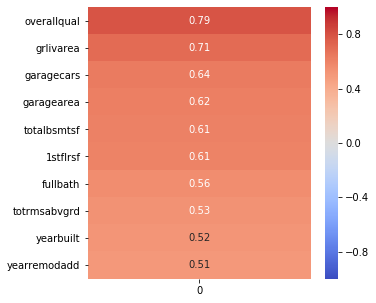

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(sorted_correlations.to_frame()[:10], cmap="coolwarm", annot=True, vmin=-1, vmax=1, ax=ax)
plt.show()

### Scatter Plot

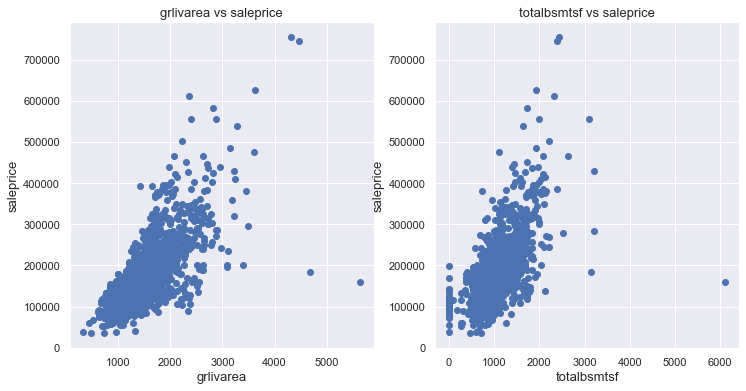

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))

ax[0].scatter(df["grlivarea"],df["saleprice"])
ax[0].set_xlabel("grlivarea",fontsize=13)
ax[0].set_ylabel("saleprice",fontsize=13)
#ax[0,0].set_xticks(fontsize=13)
#ax[0,0].set_yticks(fontsize=13)
ax[0].set_title("grlivarea vs saleprice", fontsize=13)

ax[1].scatter(df["totalbsmtsf"],df["saleprice"])
ax[1].set_xlabel("totalbsmtsf",fontsize=13)
ax[1].set_ylabel("saleprice",fontsize=13)
#ax[0,1].set_xticks(fontsize=13)
#ax[0,1].set_yticks(fontsize=13)
ax[1].set_title("totalbsmtsf vs saleprice", fontsize=13)

plt.show()

## Relationship with categorical features

In [45]:
from scipy import stats
cross_table = pd.crosstab(df["centralair"],df["saleprice"], margins=True)
print('chisq = %6.4f\n p-value = %6.4f\n dof = %i\n expected_freq =\n %s' %stats.chi2_contingency(cross_table))

chisq = 826.8569
 p-value = 1.0000
 dof = 1326
 expected_freq =
 [[6.50684932e-02 6.50684932e-02 6.50684932e-02 ... 6.50684932e-02
  6.50684932e-02 9.50000000e+01]
 [9.34931507e-01 9.34931507e-01 9.34931507e-01 ... 9.34931507e-01
  9.34931507e-01 1.36500000e+03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.46000000e+03]]


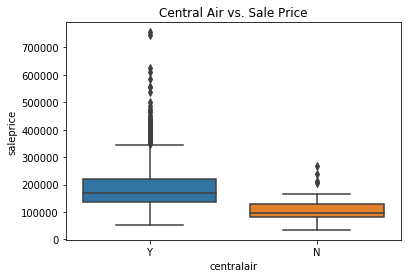

In [59]:
sns.boxplot(df["centralair"],df["saleprice"]).set_title("Central Air vs. Sale Price")
plt.show()

chisq = 2811.8004
 p-value = 0.0154
 dof = 2652
 expected_freq =
 [[6.84931507e-02 6.84931507e-02 6.84931507e-02 ... 6.84931507e-02
  6.84931507e-02 1.00000000e+02]
 [2.67123288e-02 2.67123288e-02 2.67123288e-02 ... 2.67123288e-02
  2.67123288e-02 3.90000000e+01]
 [4.01369863e-01 4.01369863e-01 4.01369863e-01 ... 4.01369863e-01
  4.01369863e-01 5.86000000e+02]
 [5.03424658e-01 5.03424658e-01 5.03424658e-01 ... 5.03424658e-01
  5.03424658e-01 7.35000000e+02]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.46000000e+03]]


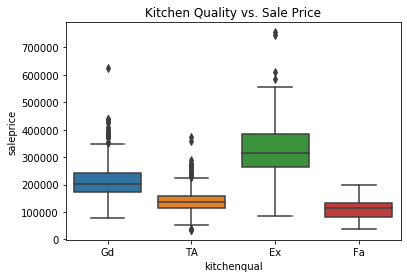

In [61]:
cross_table = pd.crosstab(df["kitchenqual"],df["saleprice"], margins=True)
print('chisq = %6.4f\n p-value = %6.4f\n dof = %i\n expected_freq =\n %s' %stats.chi2_contingency(cross_table))
sns.boxplot(df["kitchenqual"], df["saleprice"]).set_title("Kitchen Quality vs. Sale Price")
plt.show()

In [90]:
# creating a new feature called age
#df["age"] = df.apply(lambda x: x["yrsold"] - max(x["yearbuilt"], x["yearremodadd"]), axis=1)

In [96]:
#df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


# Correlation matrix

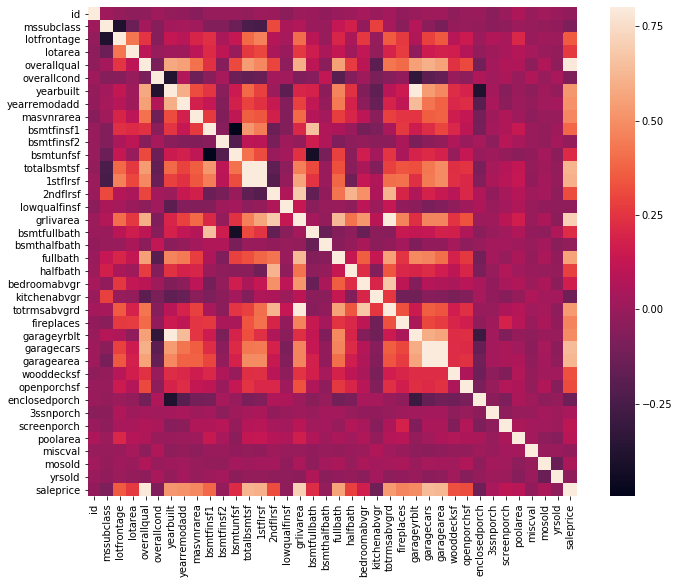

In [15]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

"totalbsmtsf" and "1stfirsf", "garagecars" and "garagearea" give almost the same information so multicollinearity really occurs --feature selection

# "saleprice" correlation matrix

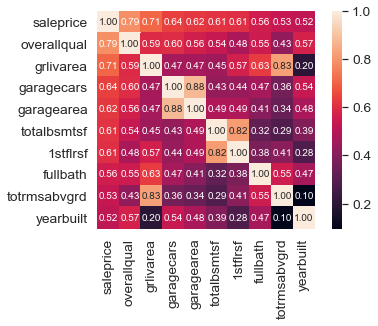

In [97]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, "saleprice")["saleprice"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

1. "overallqul", "grlivarea" are strongly correlated with "saleprice"
2. "garagecars" and "garagearea" are highly correalted, we can just keep "garagecars" since its correaltion with "saleprice" is higher
3. same for "totalbsmtsf" and "1stfirsf", keep "totalbsmtsf" for intuition
4. same for "totrmsabvgrd" and "grlivarea", keep "grlivarea" for higher correlation with target

# Scatter plots between "saleprice" and correlated variables

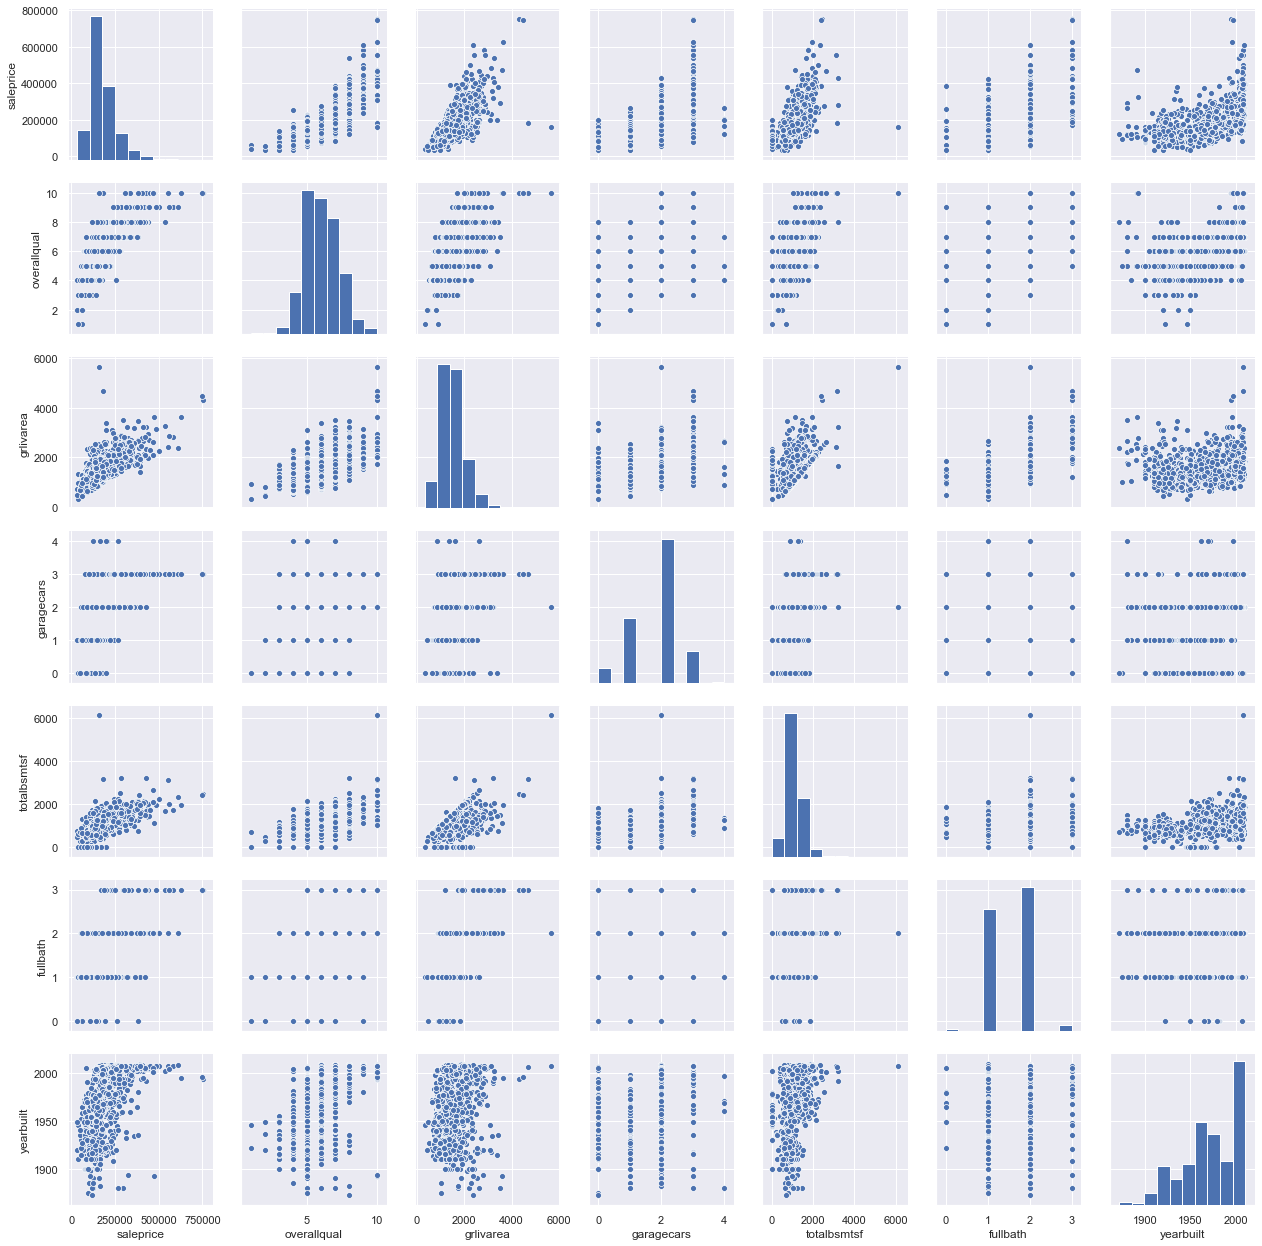

In [27]:
#scatterplot
sns.set()
cols = ["saleprice", "overallqual", "grlivarea", "garagecars", "totalbsmtsf", "fullbath", "yearbuilt"]
sns.pairplot(df[cols], size = 2.5)
plt.show()

# Missing data

In [107]:
missing = {}
missing["Total"] = df.isnull().sum().sort_values(ascending = False)
missing["Total"] = missing["Total"][missing["Total"]>0]
missing["Percentage"] = df.isnull().mean().sort_values(ascending = False)
missing["Percentage"] = missing["Percentage"][missing["Percentage"]>0]
pd.DataFrame(missing)

,Total,Percentage
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


In [108]:
df["poolqc"].value_counts()

Gd    3
Ex    2
Fa    2
Name: poolqc, dtype: int64

In [110]:
df["miscfeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: miscfeature, dtype: int64

In [111]:
df["fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: fence, dtype: int64

In [112]:
df["alley"].value_counts()

Grvl    50
Pave    41
Name: alley, dtype: int64

In [127]:
df["fireplacequ"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: fireplacequ, dtype: int64

In [129]:
df["masvnrtype"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: masvnrtype, dtype: int64

In [109]:
df.shape

(1460, 81)

We'll consider that when more than 80% of the data is missing, we should delete the corresponding variable and pretend it never existed. Since the imputation of these kinds of features could end up with more bias than just deleting them. In this case, the nan value of "poolqc", "miscfeature", "alley", "fence", "fireplacequ" actually represent NA, which means "No such amenity", so here we'll replace all the nan value with "No".

In [9]:
for i in ["poolqc","miscfeature", "alley", "fence", "fireplacequ"]:
    df[i] = df[i].fillna("No") 

"garageX" variables have the same number of missing data. I bet missing data refers to the same set of observations. Since the most important information regarding garages is expressed by "garagecars" and considering that we are just talking about 5% of missing data, I'll delete the mentioned "garageX" variables. The same logic applies to "bsmtX" variables.

In [10]:
df = df.drop(columns = ["garagecond", "garagetype", "garageyrblt", "garagefinish", "garagequal", \
                       "bsmtexposure", "bsmtfintype2", "bsmtfintype1", "bsmtcond", "bsmtqual"])

In [11]:
df.shape

(1460, 72)

For "lotfrontage", we are going to impute this variable with mean value.

Finally, we have 8 missing values in "masvnrarea" and "masvnrtype"(probably from same set of observations), 1 missing observation in "electrical". We'll impute "masvnrarea" with mean value, "masvnrtype" and "electrical" with most frequent value.

In summary, to handle missing data, we first interpret missing values in their context, then, impute "lotfrontage" with mean value, and delete the rest variables whose information is already represented in other features selected, and impute the missing values left.

In [141]:
from sklearn.impute import SimpleImputer
df["lotfrontage"] = SimpleImputer(strategy = "mean").fit_transform(df[["lotfrontage"]])
df["masvnrarea"] = SimpleImputer(strategy = "mean").fit_transform(df[["masvnrarea"]])
df["masvnrtype"] = SimpleImputer(strategy = "most_frequent").fit_transform(df[["masvnrtype"]])
df["electrical"] = SimpleImputer(strategy = "most_frequent").fit_transform(df[["electrical"]])

In [143]:
df.isnull().sum().max() #just checking that there's no missing data missing

0

In [7]:
df["age"] = df.apply(lambda x: x["yrsold"] - max(x["yearbuilt"], x["yearremodadd"]), axis=1)

In [12]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagecars,garagearea,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,age
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,2,548,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,2,460,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,2,608,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,3,642,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,3,836,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000,8


In [56]:
#df1 = df.copy().drop(columns = ["yrsold", "yearbuilt", "yearremodadd"])

In [13]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagecars', 'garagearea',
       'paveddrive', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch',
       'screenporch', 'poolarea', 'poolqc', 'fence', 'miscfeature', 'miscval',
       'mosold', '

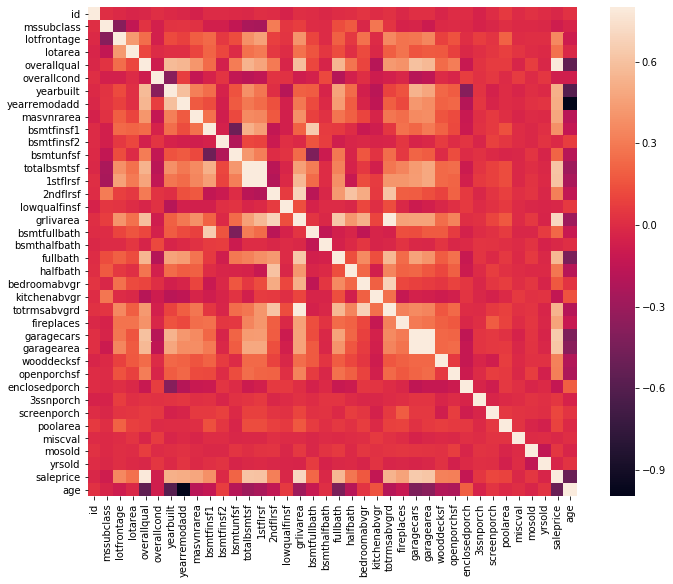

In [14]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, xticklabels=True, yticklabels=True)
#plt.xticks(rotation = 45)
plt.show()

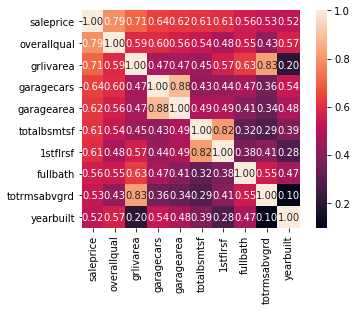

In [17]:
#saleprice correlation matrix
cols = corrmat.nlargest(10, "saleprice")["saleprice"].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
cols = corrmat.nlargest(10, "saleprice")["saleprice"].index
df[cols]

,saleprice,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,1stflrsf,fullbath,totrmsabvgrd,yearbuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000
5,143000,5,1362,2,480,796,796,1,5,1993
6,307000,8,1694,2,636,1686,1694,2,7,2004
7,200000,7,2090,2,484,1107,1107,2,7,1973
8,129900,7,1774,2,468,952,1022,2,8,1931
9,118000,5,1077,1,205,991,1077,1,5,1939


In [20]:
df.shape

(1460, 72)

In [21]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagecars,garagearea,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,age
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,2,548,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,2,460,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,2,608,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,3,642,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,3,836,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000,8


In [22]:
X = df.copy().drop(columns = "saleprice")
y = df["saleprice"]